In [1851]:
import pandas as pd 
import statistics 
import seaborn as sns 
import matplotlib.pyplot as plt

FILE_PATH = "congress-demographics/data_aging_congress.csv"

In [1852]:
df = pd.read_csv(FILE_PATH)
df.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation
0,82,1/3/51,House,ND,200,"AANDAHL, Fred George",A000001,1897-04-09,1,1,19626,53.733060,Lost
1,80,1/3/47,House,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,1,1,14106,38.620123,Greatest
2,81,1/3/49,House,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,2,2,14837,40.621492,Greatest
3,82,1/3/51,House,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,3,3,15567,42.620123,Greatest
4,83,1/3/53,House,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,4,4,16298,44.621492,Greatest


## Data Cleaning

*Numericalized the chamber column, where the house is 0 and the senate is 1*

In [1853]:
p_dct = {'House':0, 'Senate':1}
df = df.replace(p_dct)
df.head()

/var/folders/5b/6lvktnb96955q0486jnqvwf80000gn/T/ipykernel_5633/3952087084.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(p_dct)


,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation
0,82,1/3/51,0,ND,200,"AANDAHL, Fred George",A000001,1897-04-09,1,1,19626,53.733060,Lost
1,80,1/3/47,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,1,1,14106,38.620123,Greatest
2,81,1/3/49,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,2,2,14837,40.621492,Greatest
3,82,1/3/51,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,3,3,15567,42.620123,Greatest
4,83,1/3/53,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,4,4,16298,44.621492,Greatest


*Numericalize the generations*

In [1854]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['gen_num']= label_encoder.fit_transform(df['generation']) 
  
df['gen_num'].unique() 

array([5, 4, 9, 7, 1, 8, 0, 6, 3, 2])

In [1855]:
df.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,gen_num
0,82,1/3/51,0,ND,200,"AANDAHL, Fred George",A000001,1897-04-09,1,1,19626,53.733060,Lost,5
1,80,1/3/47,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,1,1,14106,38.620123,Greatest,4
2,81,1/3/49,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,2,2,14837,40.621492,Greatest,4
3,82,1/3/51,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,3,3,15567,42.620123,Greatest,4
4,83,1/3/53,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,4,4,16298,44.621492,Greatest,4


## Getting the mean for time series visualizations

In [1856]:
mean_age = df["age_years"].mean()
print(f"The overall mean age from the 66th to 118th congress is {mean_age}")

The overall mean age from the 66th to 118th congress is 53.73247531045056


*Get the unqiue list of congressional classes in the df*

In [1857]:
keys = list(set(df["congress"]))
congress_dct = {} 
len(keys)

53

In [1858]:
def get_mean(df, num, header):
    ''' Function: Given a data set and keys for a dictionary, get the mean of column of the data set and store it as a value 
        Parameters:
        df = data frame 
        num = list of str (keys for the dct)
        header = str (feature to get the mean of)
        Returns: 
        A dictionary with the mean value for each given key
    '''
    congress_dct = {}
    for item in num:
        new_df = df[df['congress'] == item]
        congress_dct[item] = statistics.mean(new_df[header])
    return congress_dct 

In [1859]:
def get_median(df, keys, header):
    ''' Function: Given a data set and keys for a dictionary, get the median of column of the data set and store it as a value 
        Parameters:
        df = data frame 
        keys = list of str (keys for the dct)
        header = str (feature to get the mean of)
        Returns: 
        A dictionary with the median value for each given key
    '''
    congress_dct = {}
    for item in keys:
        new_df = df[df['congress'] == item]
        congress_dct[item] = statistics.median(new_df[header])
    return congress_dct 

In [1860]:
def plot_time_series(x, y1, y2, l1, l2, title, c1, c2):
    ''' Function: Given the same x data and two different y datasets, plot them together to compare trends 
        Parameters:
        x = x data (lst)
        y1 = y1 data (lst)
        y2 = y2 data (lst)
        l1 = str, label for legend 
        l2 = str, label for legend
        title = str 
        c1 = color (str) 
        c2 = color (str)
        Returns: A line plot visualizing the two y data sets against the same x data 
    '''
    plt.plot(x, y1, color = c1, label = l1) 
    plt.plot(x, y2, color = c2, label = l2)
    plt.xlabel("Congressional Class")
    plt.ylabel("Age in Years")
    plt.title(title)
    plt.legend()
    return plt.show()

*Visualize the mean and median ages over time*

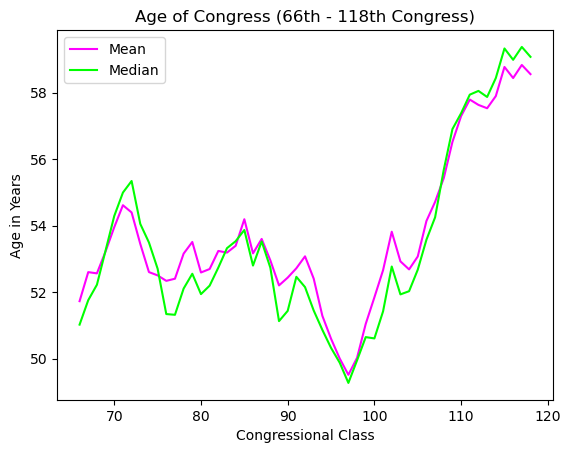

In [1861]:
congress_means = get_mean(df, keys, 'age_years')
congress_med = get_median(df, keys, 'age_years')

plot_time_series(keys, congress_means.values(), congress_med.values(), 'Mean', 'Median', 'Age of Congress (66th - 118th Congress)', 'magenta', 'lime')

*Visualize the mean and median ages over time, with respect to political parties*

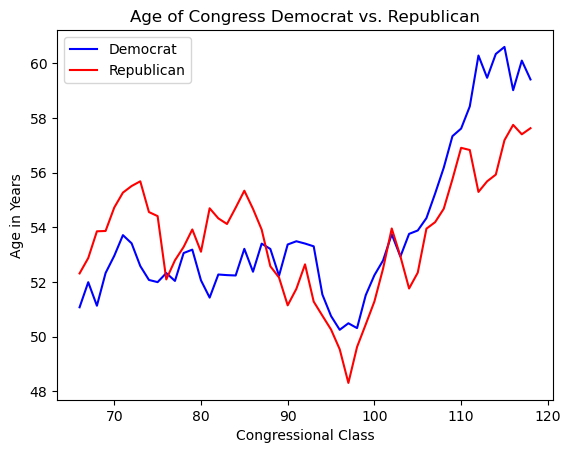

In [1862]:
democrat = get_mean(df[df['party_code'] == 100], keys, 'age_years')
republican = get_mean(df[df['party_code'] == 200], keys, 'age_years')
plot_time_series(keys, democrat.values(), republican.values(), 'Democrat', 'Republican', 'Age of Congress Democrat vs. Republican', 'blue', 'red')

*Visualize the mean and median ages over time, with respect to the 2 chambers*

In [1863]:
def normalize(lst):
    ''' given a list of numbers, scale each one in
        min/max normalization, and return a new list of
        scaled values
    '''
    mn = min(lst)
    mx = max(lst)
    scaled = []
    for num in lst:
        new_num = (num - mn) / (mx - mn)
        scaled.append(new_num)
    return scaled

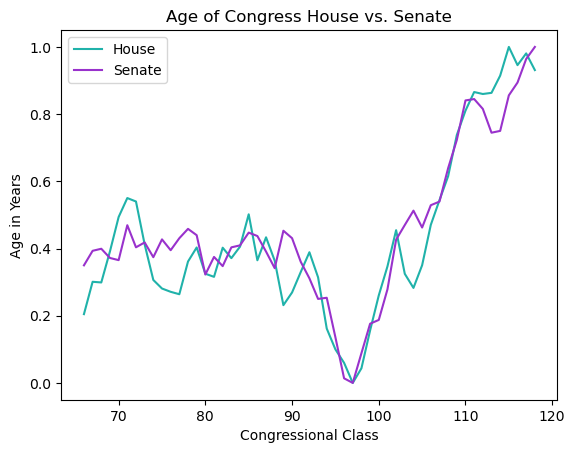

In [1864]:
senate = df[df['chamber'] == 1]
house = df[df['chamber'] == 0]
sen_means = normalize(get_mean(senate, keys, 'age_years').values())
house_means = normalize(get_mean(house, keys, 'age_years').values())

plot_time_series(keys, house_means, sen_means, 'House', 'Senate', 'Age of Congress House vs. Senate', 'lightseagreen', 'darkorchid')

In [1865]:
def compare_boxplot(df, x, hue, palette, fill, title):
    ''' Function: Given a dataframe, x and y hue headers, a palette and fill, visualize a custom boxplot 
        Parameters:
        df = data 
        x = str 
        hue = str 
        palette = dct 
        fill = boolean 
        Returns: A custom boxplot 
    '''
    sns.boxplot(data=df, x=x, hue=hue, width=.5, palette=palette, fill=fill)
    plt.xlabel('Age in Years')
    plt.title(title)
    plt.legend()
    return plt.show()

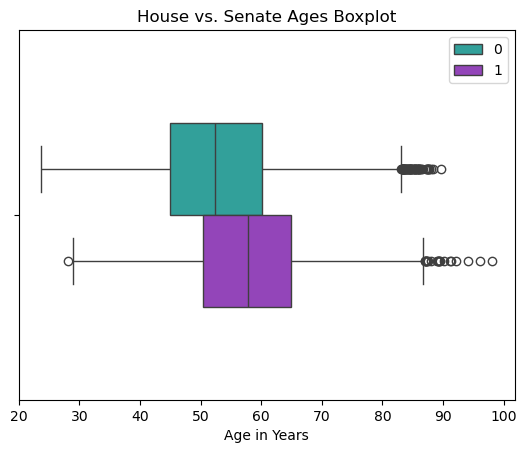

In [1866]:
chamber_pal = {0: "lightseagreen", 1: "darkorchid"}
compare_boxplot(df, 'age_years', 'chamber', chamber_pal, True, 'House vs. Senate Ages Boxplot')

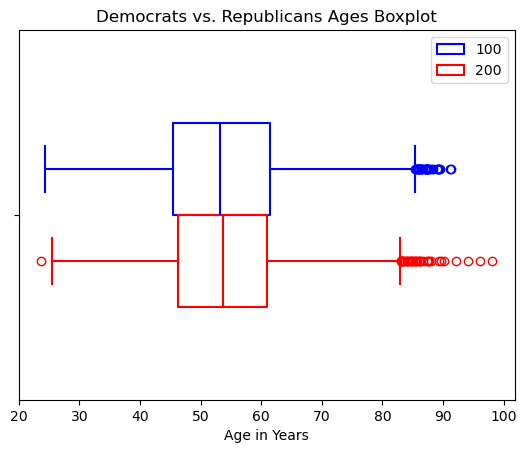

In [1867]:
party_pal = {100: "blue", 200: "red"}
party_df = df[(df['party_code'] == 100) | (df['party_code'] == 200)]

compare_boxplot(party_df, 'age_years', 'party_code', party_pal, False,'Democrats vs. Republicans Ages Boxplot')

In [1868]:
def count_gen(df, generations):
    ''' Function: Given a dataframe and list of generation, create a dct where the generation is the key 
        and the count of the ppl in that given generation are the values 
        Parameters:
        df = data 
        generations = lst of strings 
        Returns: A dct with the generation name as the key and the count as the value 
    '''
    gen_dct = {}
    for i in range(len(generations)):
        gen_dct[generations[i]] = df[df['generation'] == generations[i]].shape[0]
    return gen_dct 

labels = ['Gilded', 'Progressive', 'Missionary', 'Lost', 'Greatest', 'Silent', 'Boomers', 'Gen X', 'Millennial', 'Gen Z'] 

# this should equal the shape of the entire dataframe 
sum(count_gen(df, labels).values())

29120

In [1869]:
gen_dct = count_gen(df, labels)
gen_dct

{'Gilded': 15,
 'Progressive': 485,
 'Missionary': 4768,
 'Lost': 4732,
 'Greatest': 7147,
 'Silent': 5601,
 'Boomers': 5108,
 'Gen X': 1130,
 'Millennial': 133,
 'Gen Z': 1}

In [1870]:
def assign_colors(colors, generations):
    ''' Function: Given a list of colors and generations, assign a color to a generation 
        Parameters: 
        colors = lst of strings
        generations = list of strings 
        Returns: A dct with the generation as the key and the color as the value 
    '''
    dct = {}
    x = 0
    for i in range(len(generations)):
        dct[generations[i] + "-" + str(x)] = colors[i]
        x += 1
    return dct 

colors = ["Blue", "Green", "Red", "Purple", "yellow", "royalblue", "orange", "Pink", "magenta", "Cyan"]
plt_colors = assign_colors(colors, labels)
plt_colors

{'Gilded-0': 'Blue',
 'Progressive-1': 'Green',
 'Missionary-2': 'Red',
 'Lost-3': 'Purple',
 'Greatest-4': 'yellow',
 'Silent-5': 'royalblue',
 'Boomers-6': 'orange',
 'Gen X-7': 'Pink',
 'Millennial-8': 'magenta',
 'Gen Z-9': 'Cyan'}

*bar chart of the count of each generation in 66th - 118th congress*

/var/folders/5b/6lvktnb96955q0486jnqvwf80000gn/T/ipykernel_5633/1533353095.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=palette)


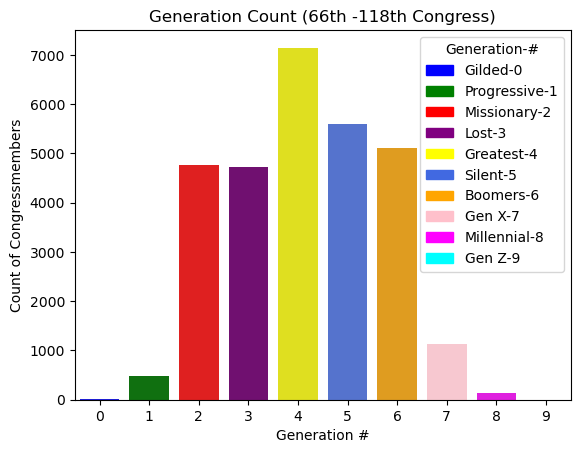

In [1871]:
count = count_gen(df,labels).values()

numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

def make_gen_barplot(x, y, palette):
    ''' Function: Plot the count for each generation in a box plot 
        Parameters:
        x = lst of int/float
        y = lst of int/float
        palette = dct
        Returns: A boxplot where the count for each generation is visualized 
    '''
    sns.barplot(x=x, y=y, palette=palette)
    plt.xlabel('Generation #')
    plt.ylabel('Count of Congressmembers')
    plt.title('Generation Count (66th -118th Congress)')
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette]
    plt.legend(legend_handles, plt_colors.keys(), title='Generation-#')
    return plt.show()

make_gen_barplot(numbers, count, plt_colors.values())

## Correlation

*Process to Create a Correlation Heatmap*

In [1872]:
df.columns

Index(['congress', 'start_date', 'chamber', 'state_abbrev', 'party_code',
       'bioname', 'bioguide_id', 'birthday', 'cmltv_cong', 'cmltv_chamber',
       'age_days', 'age_years', 'generation', 'gen_num'],
      dtype='object')

In [1873]:
corr_df = df[['congress', 'chamber', 'party_code', 'cmltv_cong','gen_num','age_years']]
corr_df.head()

,congress,chamber,party_code,cmltv_cong,gen_num,age_years
0,82,0,200,1,5,53.733060
1,80,0,100,1,4,38.620123
2,81,0,100,2,4,40.621492
3,82,0,100,3,4,42.620123
4,83,0,100,4,4,44.621492


In [1874]:
cor = corr_df.corr()
cor

,congress,chamber,party_code,cmltv_cong,gen_num,age_years
congress,1.000000,-0.000545,0.002545,0.151181,-0.399681,0.120269
chamber,-0.000545,1.000000,0.011589,0.195550,0.068348,0.185518
party_code,0.002545,0.011589,1.000000,-0.093621,-0.017202,0.005225
cmltv_cong,0.151181,0.195550,-0.093621,1.000000,0.101449,0.611355
gen_num,-0.399681,0.068348,-0.017202,0.101449,1.000000,0.138910
age_years,0.120269,0.185518,0.005225,0.611355,0.138910,1.000000


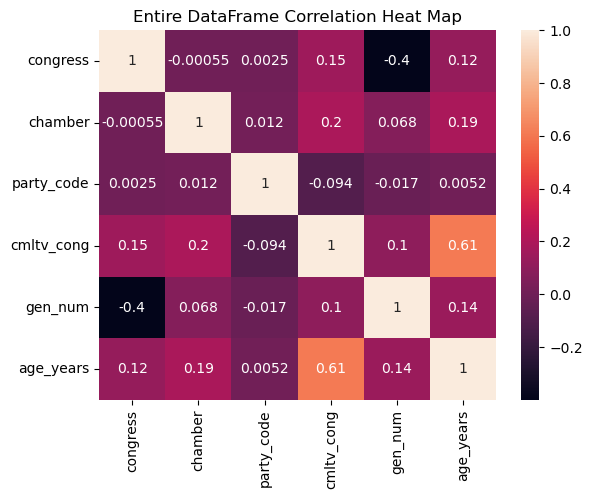

In [1875]:
sns.heatmap(data = cor, annot=True)
plt.title('Entire DataFrame Correlation Heat Map')
plt.show()

Based on the positive correlation between age in years in the number of terms in congress, I wanted to gain more insight into that data and look at the relationship between entry ages and the number of terms in congress. 

## Entry Age Data Cleaning 

In [1876]:
unique_mems = df.drop_duplicates("bioname")

def get_entry_ages(data, n_lst):
    ''' Function: Given a data and a list of unique names, return a dct where the name is the key and the entry age is the value
        Parameters:
        data = data frame 
        n_lst = list of names (string)
        Returns: A dct where the name is the key and the entry age is the value
    '''
    dct = {}
    for i in range(len(data)):
        dct[data.iloc[i]['bioname']] = data.iloc[i]['age_years']
    return dct 

names = list(unique_mems['bioname'])
get_entry_ages(unique_mems, names)

{'AANDAHL, Fred George': 53.73305955,
 'ABBITT, Watkins Moorman': 38.6201232,
 'ABDNOR, James': 49.88911704,
 'ABEL, Hazel Hempel': 64.48186174,
 'ABELE, Homer E.': 46.11635866,
 'ABERCROMBIE, Neil': 46.52429843,
 'ABERNETHY, Charles Laban': 48.95824778,
 'ABERNETHY, Thomas Gerstle': 39.63586585,
 'ABOUREZK, James George': 39.85763176,
 'ABZUG, Bella Savitzky': 50.44490075,
 'ACKERMAN, Ernest Robinson': 55.70978782,
 'ACKERMAN, Gary Leonard': 40.12320329,
 'ADAIR, Edwin Ross': 43.05544148,
 'ADAIR, Jackson Leroy': 46.02327173,
 'ADAMS, Alva Blanchard': 47.34291581,
 'ADAMS, Brockman (Brock)': 37.97399042,
 'ADAMS, Sherman': 45.98494182,
 'ADAMS, Wilbur Louis': 48.35865845,
 'ADDABBO, Joseph Patrick': 35.80013689,
 'ADDONIZIO, Hugh Joseph': 34.92402464,
 'ADERHOLT, Robert': 31.45242984,
 'ADKINS, Charles': 62.06707734,
 'AIKEN, George David': 48.36960986,
 'AKAKA, Daniel Kahikina': 52.31211499,
 'ALBAUGH, Walter Hugh': 47.00068446,
 'ALBERT, Carl Bert': 38.65023956,
 'ALBOSTA, Donald Jo

*sanity check to see if the members included in the entry age dct matches the members included in the unique members df*

In [1877]:
ea_dct = get_entry_ages(unique_mems, names)
len(list(ea_dct.values()))

5251

In [1878]:
unique_mems.shape

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(5251, 14)

In [1879]:
def init_entry_ages(df, dct):
    ''' Function: Given a dataframe and dct, apply the dct values to a new column
        Parameters: 
        df = data frame 
        dct = dct
        Returns: A data frame with a new entry age column for each congress member
    '''
    df['entry_age'] = df['bioname'].map(dct)
    return df

names = list(df['bioname'])
ea_df = init_entry_ages(df, ea_dct)
ea_df.head(15)

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,gen_num,entry_age
0,82,1/3/51,0,ND,200,"AANDAHL, Fred George",A000001,1897-04-09,1,1,19626,53.733060,Lost,5,53.733060
1,80,1/3/47,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,1,1,14106,38.620123,Greatest,4,38.620123
2,81,1/3/49,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,2,2,14837,40.621492,Greatest,4,38.620123
3,82,1/3/51,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,3,3,15567,42.620123,Greatest,4,38.620123
4,83,1/3/53,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,4,4,16298,44.621492,Greatest,4,38.620123
5,84,1/3/55,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,5,5,17028,46.620123,Greatest,4,38.620123
6,85,1/3/57,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,6,6,17759,48.621492,Greatest,4,38.620123
7,86,1/3/59,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,7,7,18489,50.620123,Greatest,4,38.620123
8,87,1/3/61,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,8,8,19220,52.621492,Greatest,4,38.620123
9,88,1/3/63,0,VA,100,"ABBITT, Watkins Moorman",A000002,5/21/08,9,9,19950,54.620123,Greatest,4,38.620123


In [1880]:
ea_df.shape

(29120, 15)

*now I want to compare the entry ages with the total number of terms served and the current age*

In [1881]:
sorted_ea = ea_df.sort_values(by="cmltv_cong", ascending = False).drop_duplicates("bioname")
sorted_ea.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,gen_num,entry_age
6954,113,1/3/13,0,MI,100,"DINGELL, John David, Jr.",D000355,7/8/26,30,30,31591,86.491444,Greatest,4,28.490075
3281,111,1/3/09,1,WV,100,"BYRD, Robert Carlyle",B001210,11/20/17,29,26,33282,91.121150,Greatest,4,35.121150
11710,90,1/3/67,1,AZ,100,"HAYDEN, Carl Trumbull",H000385,1877-10-02,29,21,32599,89.251198,Missionary,7,41.415469
5124,115,1/3/17,0,MI,100,"CONYERS, John, Jr.",C000714,5/16/29,27,27,32009,87.635866,Silent,9,35.635866
13164,112,1/3/11,1,HI,100,"INOUYE, Daniel Ken",I000025,9/7/24,27,25,31529,86.321697,Greatest,4,34.321697


## Entry Age Correlation

In [1882]:
ea_corr_df = sorted_ea[['congress', 'chamber', 'party_code', 'cmltv_cong', 'gen_num', 'entry_age', 'age_years']]
ea_corr_df.head()

,congress,chamber,party_code,cmltv_cong,gen_num,entry_age,age_years
6954,113,0,100,30,4,28.490075,86.491444
3281,111,1,100,29,4,35.121150,91.121150
11710,90,1,100,29,7,41.415469,89.251198
5124,115,0,100,27,9,35.635866,87.635866
13164,112,1,100,27,4,34.321697,86.321697


In [1883]:
ea_cor = ea_corr_df.corr()
ea_cor

,congress,chamber,party_code,cmltv_cong,gen_num,entry_age,age_years
congress,1.000000,-0.005353,-0.010876,0.190777,-0.505509,-0.142238,0.114327
chamber,-0.005353,1.000000,0.003545,0.180976,0.055169,0.091050,0.206073
party_code,-0.010876,0.003545,1.000000,-0.077900,-0.015574,0.062996,-0.013174
cmltv_cong,0.190777,0.180976,-0.077900,1.000000,0.079702,-0.176484,0.614788
gen_num,-0.505509,0.055169,-0.015574,0.079702,1.000000,0.132601,0.128931
entry_age,-0.142238,0.091050,0.062996,-0.176484,0.132601,1.000000,0.622840
age_years,0.114327,0.206073,-0.013174,0.614788,0.128931,0.622840,1.000000


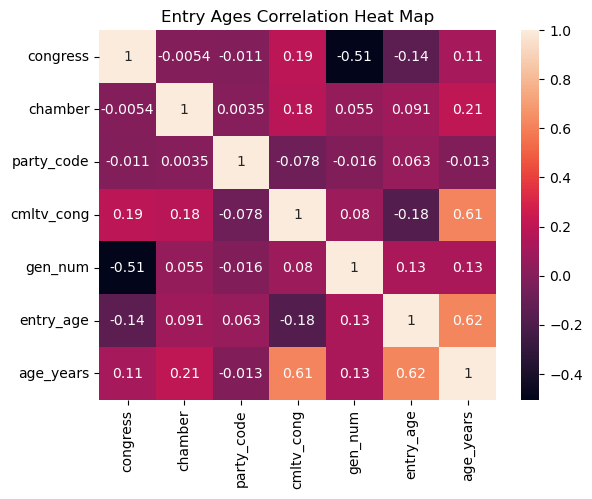

In [1884]:
sns.heatmap(data = ea_cor, annot=True)
plt.title('Entry Ages Correlation Heat Map')
plt.show()

*isolates the real entry ages and ignores the congress members who served prior to the 66th congress (start of the dataset)*

In [1885]:
real_ea = ea_df[ea_df['cmltv_cong'] == 1]
real_ea.shape

(4787, 15)

In [1886]:
congress_class = real_ea['congress']
entry_ages = real_ea['entry_age']

*Plot data to visualize any patterns for regression model*

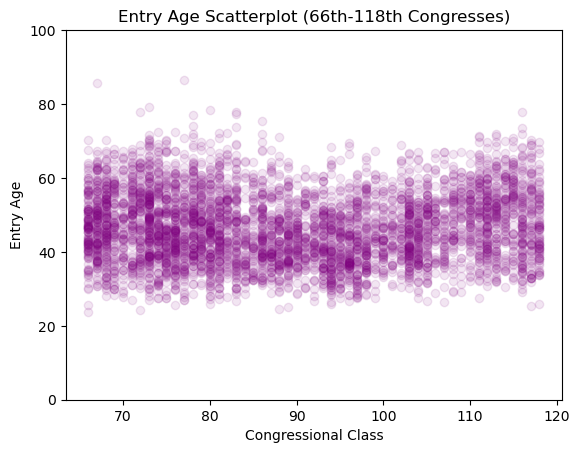

In [1887]:
plt.scatter(congress_class, entry_ages, alpha=0.1, color='purple')
plt.ylim(0, 100)
plt.xlabel('Congressional Class')
plt.ylabel('Entry Age')
plt.title('Entry Age Scatterplot (66th-118th Congresses)')
plt.show()

## Entry Age Visualizations 

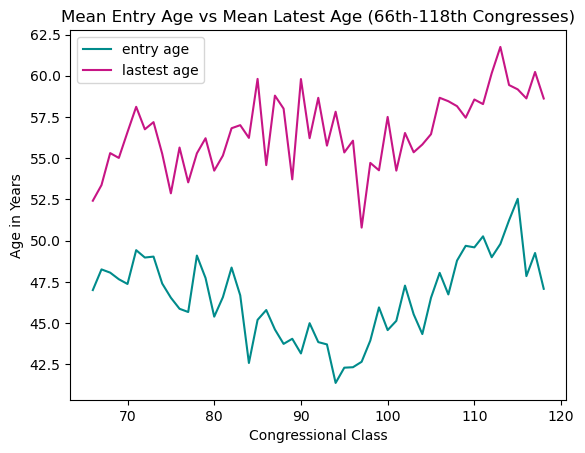

In [1888]:
mean_entry_ages = get_mean(real_ea, keys, "entry_age")
mean_real_ages = get_mean(sorted_ea, keys, "age_years")
plot_time_series(keys, mean_entry_ages.values(), mean_real_ages.values(), 'entry age', 'lastest age', 'Mean Entry Age vs Mean Latest Age (66th-118th Congresses)', 'darkcyan', 'mediumvioletred')

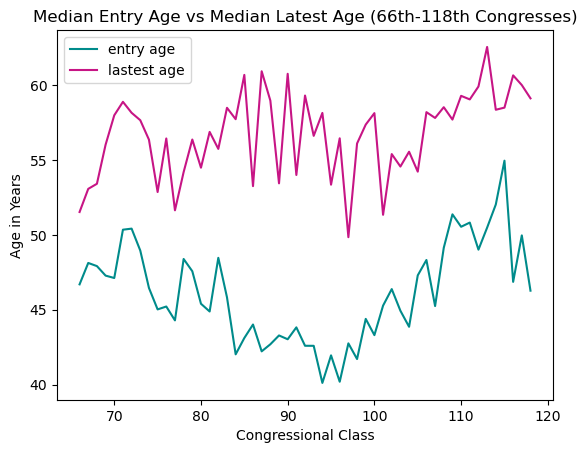

In [1889]:
median_entry_ages = get_median(real_ea, keys, "entry_age")
median_real_ages = get_median(sorted_ea, keys, "age_years")

plot_time_series(keys, median_entry_ages.values(), median_real_ages.values(), 'entry age', 'lastest age', 'Median Entry Age vs Median Latest Age (66th-118th Congresses)', 'darkcyan', 'mediumvioletred')

*Mean and median results are fairly similar and share the same overall trends from the 66th to 118th congresses*

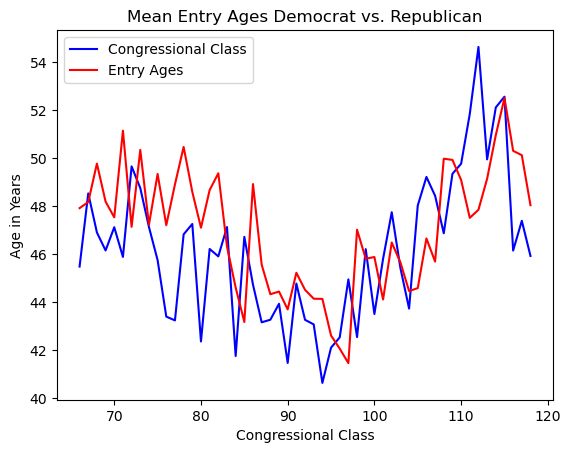

In [1890]:
dems_ea = real_ea[real_ea['party_code'] == 100]
dem_means = get_mean(dems_ea, keys, "entry_age").values()
reps_ea = real_ea[real_ea['party_code'] == 200]
rep_means = get_mean(reps_ea, keys, "entry_age").values()

plot_time_series(keys, dem_means, rep_means, 'Congressional Class', 'Entry Ages', "Mean Entry Ages Democrat vs. Republican", 'blue', 'red')

# Merging the sorted & real data frames

*need to make a sorted_ea data frame that has the same people as the people in the real_ea!*

In [1891]:
sorted_ea.shape, real_ea.shape

((5251, 15), (4787, 15))

In [1892]:
merged_df = pd.merge(real_ea, sorted_ea, on='bioname')
merged_df['age_years_x']

0       53.733060
1       38.620123
2       49.889117
3       64.481862
4       46.116359
          ...    
4782    46.143737
4783    42.992471
4784    59.901437
4785    34.926762
4786    53.171800
Name: age_years_x, Length: 4787, dtype: float64

In [1893]:
iso_features = ['bioname','age_years_x','age_years_y','cmltv_cong_y']
merged_df[iso_features]

,bioname,age_years_x,age_years_y,cmltv_cong_y
0,"AANDAHL, Fred George",53.733060,53.733060,1
1,"ABBITT, Watkins Moorman",38.620123,62.620123,13
2,"ABDNOR, James",49.889117,61.889117,7
3,"ABEL, Hazel Hempel",64.481862,64.481862,1
4,"ABELE, Homer E.",46.116359,46.116359,1
...,...,...,...,...
4782,"ZORINSKY, Edward",46.143737,58.143737,7
4783,"ZSCHAU, Edwin Van Wyck",42.992471,44.993840,2
4784,"ZWACH, John Matthew",59.901437,65.902806,4
4785,"ZELDIN, Lee M",34.926762,40.928131,4


*sanity check to see if the merge worked correctly in terms of the number of rows!*

In [1894]:
merged_df.shape, real_ea.shape

((4787, 29), (4787, 15))

In [1895]:
def plot_box(data, x, y, colors, dct, l1, l2):
    ''' Function: Given a data frame, x & y labels, dct of colors, dct of labels, and two labels, 
        plot a custom box plot 
        Parameters:
        data = data frame 
        x = string
        y = string
        colors = dct
        dct = dct 
        l1 = string 
        l2 = string 
        Returns: A custom boxplot
    '''
    sns.boxplot(data=data, x=x, y=y, width=0.5, palette=colors)
    plt.xticks(ticks=[0, 1], labels=[dct[l1], dct[l2]])
    plt.xlabel('Age Type')
    plt.ylabel('Age')
    plt.title('Entry Ages vs Real Ages')
    return plt.show()

/var/folders/5b/6lvktnb96955q0486jnqvwf80000gn/T/ipykernel_5633/3773339216.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, width=0.5, palette=colors)


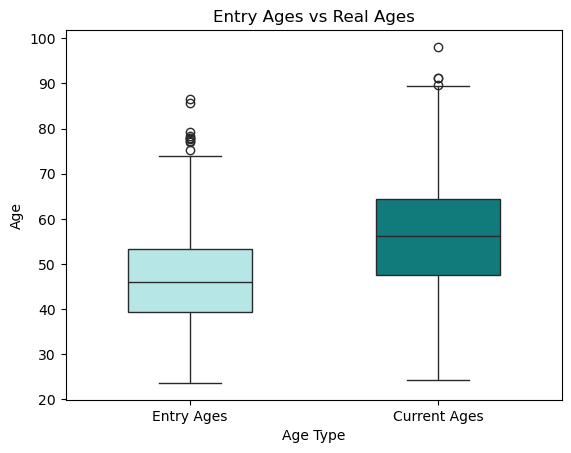

In [1896]:
custom_labels = {'age_years_x': 'Entry Ages', 'age_years_y': 'Current Ages'}
custom_colors = {'age_years_x': 'paleturquoise', 'age_years_y': "darkcyan"}

melted_df = merged_df.melt(value_vars=['age_years_x', 'age_years_y'], var_name='age_type', value_name='age')

plot_box(melted_df, 'age_type', 'age', custom_colors, custom_labels, 'age_years_x', 'age_years_y')

# Mutiple Linear & Polynomial Regression using Entry Ages

*Goal = be able to predict the age of a congress member based on their congressional class, number of terms served,
        generation, and entry age*
*Focusing on the congress, cmltv_cong, and entry age as they had a noticeable correlation with the current age of congressmembers*

1. Normalize labels/x variables
2. Run linear and then try multiple regression
3. Evaulate models using mean squared error, r2, and cross-validation score

In [1897]:
from sklearn import preprocessing

normalized_ea = preprocessing.normalize(sorted_ea[['congress', 'cmltv_cong', 'gen_num', 'entry_age']])
normalized_df = pd.DataFrame(normalized_ea, columns=['congress', 'cmltv_cong', 'gen_num', 'entry_age'])
normalized_df

,congress,cmltv_cong,gen_num,entry_age
0,0.938521,0.249165,0.033222,0.236624
1,0.924631,0.241570,0.033320,0.292560
2,0.869850,0.280285,0.067655,0.400280
3,0.929571,0.218247,0.072749,0.288053
4,0.931170,0.224479,0.033256,0.285351
...,...,...,...,...
5246,0.856015,0.011414,0.057068,0.513664
5247,0.889197,0.008469,0.076217,0.451053
5248,0.914716,0.011579,0.046315,0.401268
5249,0.832962,0.011569,0.057845,0.550177


In [1898]:
normalized_df['age_years'] = list(sorted_ea['age_years'])
normalized_df['party_code'] = list(sorted_ea['party_code'])
normalized_df['chamber'] = list(sorted_ea['chamber'])
normalized_df

,congress,cmltv_cong,gen_num,entry_age,age_years,party_code,chamber
0,0.938521,0.249165,0.033222,0.236624,86.491444,100,0
1,0.924631,0.241570,0.033320,0.292560,91.121150,100,1
2,0.869850,0.280285,0.067655,0.400280,89.251198,100,1
3,0.929571,0.218247,0.072749,0.288053,87.635866,100,0
4,0.931170,0.224479,0.033256,0.285351,86.321697,100,1
...,...,...,...,...,...,...,...
5246,0.856015,0.011414,0.057068,0.513664,45.004791,100,0
5247,0.889197,0.008469,0.076217,0.451053,53.262149,100,0
5248,0.914716,0.011579,0.046315,0.401268,34.655715,100,0
5249,0.832962,0.011569,0.057845,0.550177,47.556468,100,0


In [1899]:
from sklearn.model_selection import train_test_split 

x_features = ['congress', 'cmltv_cong', 'gen_num', 'entry_age']
X_train, X_test, y_train, y_test = train_test_split(normalized_df[x_features], normalized_df['age_years'], random_state=0)
X_test.shape, X_train.shape

((1313, 4), (3938, 4))

## Linear Regression

In [1900]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1901]:
def eval_regression(m, x, y):
    ''' Function: Given x, y data, and model, return the MSE and r-squared scores for evaluation 
        Parameters:
        m = regression model (func)
        x = x data
        y = y data2
        Returns: the MSE and r-squares scores
    '''
    prediction = m.predict(x)
    mse = mean_squared_error(y, prediction)
    r2 = r2_score(y, prediction)
    return (mse, r2)

*Evaulating the prediction on the testing data*

In [1902]:
eval_regression(model, X_test, y_test)

(49.7995894546857, 0.6219662973148954)

*Evaulating the prediction on the training data*

In [1903]:
eval_regression(model, X_train, y_train)

(50.0730861781431, 0.6253134614764099)

*The mse for the testing data was more accurate than the mse for the training data.
The difference was fairly even, and the r-squared score is greater for the training vs the testing data.
Overall, the mean squared is not great, but the r-squared score is note-worthy.*

*Let's make some predictions!*

1. Get the model to predict what age Elizabeth Warren will be in the next congress [congress = 119, cmltv_cong = 7, gen_num = 0, entry_age = 63.534565
2. add on!  

In [1904]:
e_warren = sorted_ea[sorted_ea['bioname'] == 'WARREN, Elizabeth'].iloc[-1]
e_warren

congress                       118
start_date                  1/3/23
chamber                          1
state_abbrev                    MA
party_code                     100
bioname          WARREN, Elizabeth
bioguide_id                W000817
birthday                   6/22/49
cmltv_cong                       6
cmltv_chamber                    6
age_days                     26858
age_years                73.533196
generation                 Boomers
gen_num                          0
entry_age                63.534565
Name: 28823, dtype: object

In [1905]:
def make_age_prediction(m, features):
    ''' Function: given the list of features, normalize the inputs and then predict the age using a linear regression model
        Parameters:
        model = linear regression model
        features = list of feature values used in the regression model (int/float)
        '''
    norm_data = preprocessing.normalize([features])
    cong_predict = m.predict(norm_data)
    return cong_predict

warren_predict = make_age_prediction(model, [119, e_warren['cmltv_cong'] + 1, e_warren['gen_num'], e_warren['entry_age']])
warren_predict

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.72667255])

In [1906]:
e_warren['age_years'] + 2

75.53319644

*Let's compare the prediction vs the what age E. Warren will actually be*

In [1907]:
diff = warren_predict - (e_warren['age_years'] + 2)
diff[0]

-11.806523886019512

In [1908]:
print(f"This linear regression model predicted that Elizabeth Warren would be {abs(diff[0])} younger")

This linear regression model predicted that Elizabeth Warren would be 11.806523886019512 younger


## Polynommial Regression

*Predict the age of a congressmember but with polynomial regression*

In [1909]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures

degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]

def best_degree(lst, x_test, y_test):
    ''' Function: Given a list of possible degrees and testing data, find the optimal one based on MSE
        Parameters: 
        - lst = list of ints 
        - x_test = x-testing data 
        - y_test = y-testing data
        Returns: 
        The optimal degree for poly regression using MSE
    '''
    score_dct = {}
    kf = KFold(shuffle = True, random_state = 0)
    poly_model = LinearRegression()
    for degree in lst:
        poly = PolynomialFeatures(degree=degree)
        X_test_poly = poly.fit_transform(x_test)
        
        score_lst = cross_val_score(poly_model, X_test_poly, y_test, cv=kf, scoring='neg_mean_squared_error')
        mse_scores = -score_lst

        score_dct[degree] = statistics.mean(mse_scores)
    return min(score_dct, key=score_dct.get)
    
op_degree = best_degree(degrees, X_test, y_test)
op_degree

4

In [1910]:
poly = PolynomialFeatures(degree=op_degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

*Evaulate the prediction on the training data*

In [1911]:
eval_regression(poly_model, X_train_poly, y_train)

(18.96981469119935, 0.8580528035002173)

In [1912]:
X_train_poly.shape, X_train.shape

((3938, 70), (3938, 4))

*The mse and r-squared score are both improving with the polynomial regression model!*

*Evaulate the prediction on the testing data*

In [1913]:
eval_regression(poly_model, X_test_poly, y_test)

(18.930076921262415, 0.8562998781913584)

## Visualizations & Predictions

In [1914]:
list(X_test.columns)
y_test_pred = poly_model.predict(X_test_poly)

*Visualize the relationship between the each feature in the regression model with the corresponding predicted data, on the testing data*

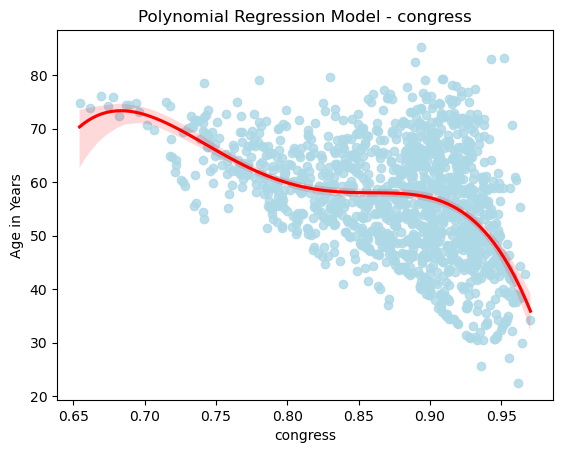

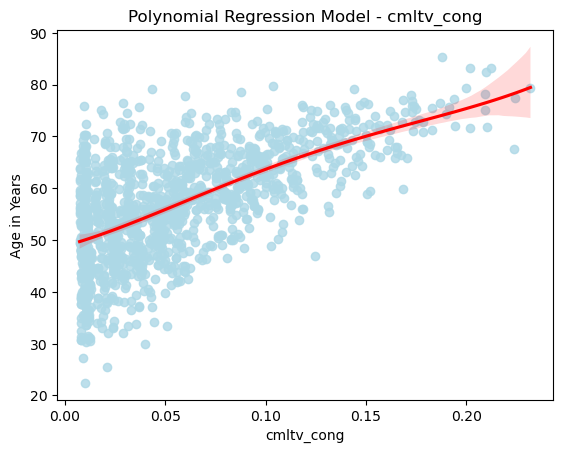

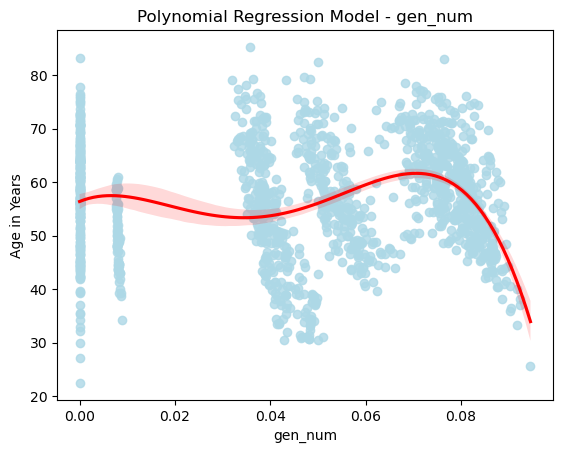

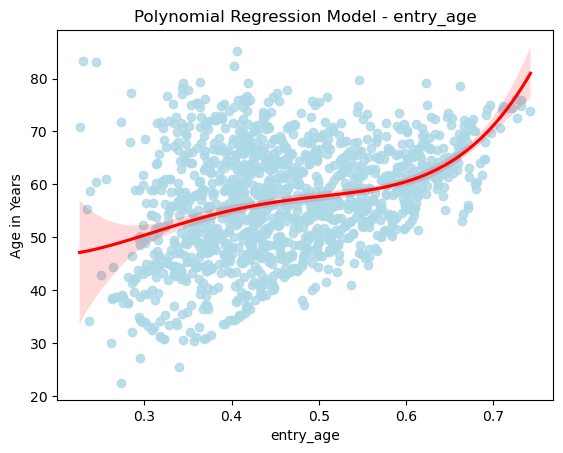

In [1915]:
for label in list(X_test.columns):
    sns.regplot(x = X_test[label], y = y_test_pred, order = 4, scatter_kws={'color': 'lightblue'}, line_kws={'color': 'red'})
    plt.xlabel(label)
    plt.ylabel('Age in Years')
    plt.title(f'Polynomial Regression Model - {label}')
    plt.show()

In [1916]:
poly_model.coef_, poly_model.intercept_

(array([ 5.07614160e+08,  6.07088377e+13,  3.41398824e+12,  2.30025043e+12,
         5.09995382e+13, -6.13008220e+13,  2.23102976e+12,  3.39545250e+12,
         2.53501897e+13, -1.12466288e+14,  3.36399532e+11,  2.48504965e+12,
        -1.12722902e+14,  1.27000677e+12, -1.05838669e+14, -6.07087103e+13,
        -3.41394316e+12, -2.30026644e+12, -5.09993913e+13, -6.07087613e+13,
        -1.06268471e+06,  3.77584610e+07, -6.07087717e+13, -9.27096276e+06,
        -6.07087020e+13, -3.41397456e+12, -2.30025419e+12, -5.09994909e+13,
        -3.41397259e+12,  7.55291306e+05, -3.41396338e+12, -2.30025327e+12,
        -5.09994955e+13, -2.30025618e+12, -5.09994800e+13, -5.92740501e+13,
        -2.23107482e+12, -3.39543648e+12, -2.53503365e+13, -6.73825200e+13,
        -3.36398575e+11, -2.48508773e+12, -6.71258950e+13, -1.26999759e+12,
        -7.40101988e+13, -2.23106569e+12, -3.39544050e+12, -2.53503090e+13,
        -2.23106723e+12, -2.60566316e+05, -2.23107549e+12, -3.39543972e+12,
        -2.5

*Let's try to predict E. Warren's with the poly. regression model*

In [1917]:
def make_poly_prediction(m, features, p):
    ''' Function: given the inputs, normalize the inputs and then predict the age using a polynomial regression model
        Parameters:
        model = poly regression model
        features = list of feature values used in the regression model (int/float)
    '''
    norm_data = preprocessing.normalize([features])
    cong_predict = m.predict(p.transform(norm_data))
    return cong_predict

warren_poly = make_poly_prediction(poly_model, [119,  e_warren['cmltv_cong'] + 1,  e_warren['gen_num'], e_warren['entry_age']], poly)
warren_poly

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([76.34375])

In [1918]:
poly_diff = warren_poly - (e_warren['age_years'] + 2)
poly_diff[0]

0.8105535600000024

In [1919]:
print(f"This polynomial regression model predicted that Elizabeth Warren would be {abs(poly_diff[0])} older")

This polynomial regression model predicted that Elizabeth Warren would be 0.8105535600000024 older


*This difference is much smaller with the polynomial regression than the difference with the linear regression*

# Mutiple Linear & Polynomial Regression for the Senate

*Goal = be able to predict the age of a congress member based on their congressional class,
number of terms served in congress & chamber, and generation.*

In [1920]:
senate.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,gen_num
18,97,1/3/81,1,SD,200,"ABDNOR, James",A000009,2/13/23,5,1,21144,57.889117,Greatest,4
19,98,1/3/83,1,SD,200,"ABDNOR, James",A000009,2/13/23,6,2,21874,59.887748,Greatest,4
20,99,1/3/85,1,SD,200,"ABDNOR, James",A000009,2/13/23,7,3,22605,61.889117,Greatest,4
21,83,1/3/53,1,NE,200,"ABEL, Hazel Hempel",A000010,1888-07-10,1,1,23552,64.481862,Lost,5
57,93,1/3/73,1,SD,100,"ABOUREZK, James George",A000017,2/24/31,2,1,15289,41.859001,Silent,9


In [1921]:
sen_features = ['congress','party_code','cmltv_cong','cmltv_chamber','gen_num', 'age_years']
senate_cor = senate[sen_features].corr()
senate_cor

,congress,party_code,cmltv_cong,cmltv_chamber,gen_num,age_years
congress,1.000000,0.022666,0.211755,0.180886,-0.350035,0.128253
party_code,0.022666,1.000000,-0.084616,-0.080086,0.032858,0.021607
cmltv_cong,0.211755,-0.084616,1.000000,0.864764,0.092990,0.605191
cmltv_chamber,0.180886,-0.080086,0.864764,1.000000,0.130142,0.623989
gen_num,-0.350035,0.032858,0.092990,0.130142,1.000000,0.092543
age_years,0.128253,0.021607,0.605191,0.623989,0.092543,1.000000


*get the features for the regression model*

In [1922]:
sen_features[0:-1]

['congress', 'party_code', 'cmltv_cong', 'cmltv_chamber', 'gen_num']

In [1923]:
norm_senate = preprocessing.normalize(senate[sen_features[0:-1]])
norm_senate = pd.DataFrame(norm_senate, columns=sen_features[0:-1])
norm_senate

,congress,party_code,cmltv_cong,cmltv_chamber,gen_num
0,0.436199,0.899378,0.022484,0.004497,0.017988
1,0.439767,0.897484,0.026925,0.008975,0.017950
2,0.443296,0.895547,0.031344,0.013433,0.017911
3,0.383193,0.923357,0.004617,0.004617,0.023084
4,0.679448,0.730589,0.014612,0.007306,0.065753
...,...,...,...,...,...
5493,0.690755,0.719536,0.021586,0.021586,0.064758
5494,0.694240,0.715711,0.028628,0.028628,0.064414
5495,0.697602,0.711838,0.035592,0.035592,0.064065
5496,0.700842,0.707921,0.042475,0.042475,0.063713


In [1924]:
senate_X = norm_senate[sen_features[0:-1]]
senate_y = senate['age_years']
senate_X.shape, senate_y.shape

((5498, 5), (5498,))

In [1925]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(senate_X, senate_y, random_state=0)
Xs_test.shape, Xs_train.shape

((1375, 5), (4123, 5))

## Linear Regression

In [1926]:
lr = LinearRegression()
lr.fit(Xs_train, ys_train)

LinearRegression()

*Evaulate the model on the testing data*

In [1927]:
eval_regression(lr, Xs_test, ys_test)

(66.83857938559267, 0.35950119476519216)

*Evaulate the model on the training data*

In [1928]:
eval_regression(lr, Xs_train, ys_train)

(68.26732801325893, 0.3670383565032479)

*Elizabeth Warren prediction for the 119th Congress*

In [1929]:
warren_sen_lr = make_age_prediction(lr, [119, e_warren['party_code'], e_warren['cmltv_cong'] + 1, e_warren['cmltv_chamber'] + 1, e_warren['gen_num']])
warren_sen_lr

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.04816545])

In [1930]:
actual_warren = e_warren['age_years'] + 2
warren_lr_diff = warren_sen_lr - actual_warren
warren_lr_diff

array([-17.48503099])

In [1931]:
print(f"The model predicted that Warren would be {abs(warren_lr_diff[0])} younger than her actual age at the start of the 119th Congress")

The model predicted that Warren would be 17.485030991953124 younger than her actual age at the start of the 119th Congress


## Polynomial Regression

In [1932]:
op_senate_degree = best_degree(degrees, Xs_test, ys_test)
op_senate_degree

3

In [1933]:
poly2 = PolynomialFeatures(degree=op_senate_degree)
poly2_model = LinearRegression()

sen_train_poly = poly2.fit_transform(Xs_train)
sen_test_poly = poly2.transform(Xs_test)

poly2_model.fit(sen_train_poly, ys_train)

LinearRegression()

*Evaluating the model on the testing data*

In [1934]:
eval_regression(poly2_model, sen_test_poly, ys_test)

(54.95359882385834, 0.47339224271991)

*Evaluating the model on the training data*

In [1935]:
eval_regression(poly2_model, sen_train_poly, ys_train)

(52.337529744482, 0.5147364074774774)

In [1936]:
warren_poly_pred = make_poly_prediction(poly2_model, [119, e_warren['party_code'], e_warren['cmltv_cong']+1, e_warren['cmltv_chamber']+1, e_warren['gen_num']], poly2)
warren_poly_pred

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([65.69882202])

In [1937]:
warren_sen_diff = warren_poly_pred - actual_warren
warren_sen_diff

array([-9.83437442])

In [1938]:
print(f"The model predicted that Warren would be {abs(warren_sen_diff[0])} younger than her actual age at the start of the 119th Congress")

The model predicted that Warren would be 9.834374418515623 younger than her actual age at the start of the 119th Congress


# Multiple & Polynomial Regression for Massachusetts 

*Goal = be able to predict the age of a congress member based on their congressional class,
number of terms served in congress & chamber, and generation.*

In [1939]:
mass = df[df['state_abbrev'] == 'MA']
mass.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,gen_num,entry_age
296,117,1/3/21,0,MA,100,"AUCHINCLOSS, Jake",A000148,1/29/88,1,1,12028,32.930869,Millennial,6,32.930869
297,118,1/3/23,0,MA,100,"AUCHINCLOSS, Jake",A000148,1/29/88,2,2,12758,34.929500,Millennial,6,32.930869
594,99,1/3/85,0,MA,100,"ATKINS, Chester Greenough",A000226,4/14/48,1,1,13413,36.722793,Boomers,0,36.722793
595,100,1/3/87,0,MA,100,"ATKINS, Chester Greenough",A000226,4/14/48,2,2,14143,38.721424,Boomers,0,36.722793
596,101,1/3/89,0,MA,100,"ATKINS, Chester Greenough",A000226,4/14/48,3,3,14874,40.722793,Boomers,0,36.722793


In [1940]:
normalized_ma = preprocessing.normalize(mass[['congress','chamber','party_code','cmltv_cong','cmltv_chamber','gen_num']])
normalized_ma = pd.DataFrame(normalized_ma, columns=['congress','chamber','party_code','cmltv_cong','cmltv_chamber','gen_num'])
normalized_ma['age_years'] = mass['age_years'].values
normalized_ma

,congress,chamber,party_code,cmltv_cong,cmltv_chamber,gen_num,age_years
0,0.759564,0.000000,0.649200,0.006492,0.006492,0.038952,32.930869
1,0.762195,0.000000,0.645928,0.012919,0.012919,0.038756,34.929500
2,0.703509,0.000000,0.710615,0.007106,0.007106,0.000000,36.722793
3,0.706965,0.000000,0.706965,0.014139,0.014139,0.000000,38.721424
4,0.710300,0.000000,0.703267,0.021098,0.021098,0.000000,40.722793
...,...,...,...,...,...,...,...
787,0.751612,0.006593,0.659309,0.013186,0.013186,0.000000,65.533196
788,0.754297,0.006559,0.655910,0.019677,0.019677,0.000000,67.534565
789,0.756878,0.006525,0.652481,0.026099,0.026099,0.000000,69.533196
790,0.759356,0.006490,0.649022,0.032451,0.032451,0.000000,71.534565


In [1941]:
ma_X = normalized_ma[['congress','chamber','party_code','cmltv_cong','gen_num']]
ma_y = normalized_ma['age_years']

In [1942]:
ma_X_train, ma_X_test, ma_y_train, ma_y_test = train_test_split(ma_X, ma_y, random_state=0)
ma_X_test.shape

(198, 5)

## Linear Regression

In [1943]:
lr_ma = LinearRegression()
lr_ma.fit(X = ma_X_train, y = ma_y_train)

LinearRegression()

*Evaluating the model on the testing data*

In [1944]:
eval_regression(lr_ma, ma_X_test, ma_y_test)

(74.26580938772476, 0.47199574482692996)

*Evaluating the model on the training data*

In [1945]:
eval_regression(lr_ma, ma_X_train, ma_y_train)

(56.99323019639972, 0.5197674227257161)

In [1946]:
warren_ma_lr = make_age_prediction(lr_ma, [119, e_warren['chamber'], e_warren['party_code'], e_warren['cmltv_cong'] + 1, e_warren['gen_num']])
warren_ma_lr

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([50.84282248])

In [1947]:
warren_ma_lr_diff = warren_ma_lr - actual_warren
print(f"The model predicted Elizabeth Warren to be {abs(warren_ma_lr_diff[0])} years younger than her actual age at the start of the 119th Congress")

The model predicted Elizabeth Warren to be 24.690373962562788 years younger than her actual age at the start of the 119th Congress


## Polynomial Regression

In [1948]:
op_ma_degree = best_degree(degrees, ma_X_test, ma_y_test)
op_ma_degree

2

In [1949]:
poly3 = PolynomialFeatures(degree=op_ma_degree)
poly3_model = LinearRegression()

ma_train_poly = poly3.fit_transform(ma_X_train)
ma_test_poly = poly3.transform(ma_X_test)

poly3_model.fit(ma_train_poly, ma_y_train)

LinearRegression()

*Evaluating the model of the testing data*

In [1950]:
eval_regression(poly3_model, ma_test_poly, ma_y_test)

(59.304944645876944, 0.578362326028832)

*Evaluating the model of the training data*

In [1951]:
eval_regression(poly3_model, ma_train_poly, ma_y_train)

(43.11580294058541, 0.6367004801086804)

## Predictions

*Now let's predict E.Warren, E.Markey, and Jake Auchincloss*
1. E.Warren's age at the start of the 119th Congress
2. E.Markey's age at the start of the 120th Congress
3. Jake Auchincloss's age at the start of the 130th Congress

In [1952]:
warren_ma_poly =  make_poly_prediction(poly3_model, [119, e_warren['chamber'], e_warren['party_code'], e_warren['cmltv_cong']+1, e_warren['gen_num']], poly3)
warren_ma_poly

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([61.33704568])

In [1953]:
print(f'Actual - Predicted: {warren_ma_poly - actual_warren}')

Actual - Predicted: [-14.19615076]


In [1954]:
e_markey = sorted_ea[sorted_ea['bioname'] == 'MARKEY, Edward John'].iloc[-1]
e_markey

congress                         118
start_date                    1/3/23
chamber                            1
state_abbrev                      MA
party_code                       100
bioname          MARKEY, Edward John
bioguide_id                  M000133
birthday                     7/11/46
cmltv_cong                        25
cmltv_chamber                      6
age_days                       27935
age_years                  76.481862
generation                   Boomers
gen_num                            0
entry_age                  28.481862
Name: 16810, dtype: object

In [1955]:
markey_ma_poly =  make_poly_prediction(poly3_model, [120, e_markey['chamber'], e_markey['party_code'], e_markey['cmltv_cong']+2, e_markey['gen_num']], poly3)
markey_ma_poly

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([73.61522484])

In [1956]:
actual_markey = e_markey['age_years'] + 2
print(f'Actual - Predicted: {markey_ma_poly - actual_markey}')

Actual - Predicted: [-4.8666369]


In [1957]:
j_auchin = mass[mass['bioname'] == 'AUCHINCLOSS, Jake'].iloc[-1]
j_auchin

congress                       118
start_date                  1/3/23
chamber                          0
state_abbrev                    MA
party_code                     100
bioname          AUCHINCLOSS, Jake
bioguide_id                A000148
birthday                   1/29/88
cmltv_cong                       2
cmltv_chamber                    2
age_days                     12758
age_years                  34.9295
generation              Millennial
gen_num                          6
entry_age                32.930869
Name: 297, dtype: object

In [1958]:
auchin_ma_poly =  make_poly_prediction(poly3_model, [130, j_auchin['chamber'], j_auchin['party_code'], j_auchin['cmltv_cong']+12, j_auchin['gen_num']], poly3)
auchin_ma_poly

/Users/springyan/anaconda3/envs/ds2500/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([79.58140936])

In [1959]:
actual_auchin = j_auchin['age_years'] + 24
print(f'Actual - Predicted: {auchin_ma_poly - actual_auchin}')

Actual - Predicted: [20.65190902]


## Elizabeth Warren Prediction Visualization

*Make a dictionary that has the type of regression model as the key and the actual result of the prediction as the value*

In [1960]:
actual_warren

75.53319644

In [1961]:
models = ['Linear EA', 'Poly EA', 'Linear Senate', 'Poly Senate', 'Linear MA', 'Poly MA']

In [1962]:
pred_lst = [warren_predict[0], warren_poly[0], warren_sen_lr[0], warren_poly_pred[0], warren_ma_lr[0], warren_ma_poly[0]]
pred_lst

[63.726672553980485,
 76.34375,
 58.04816544804687,
 65.69882202148438,
 50.84282247743721,
 61.337045679183575]

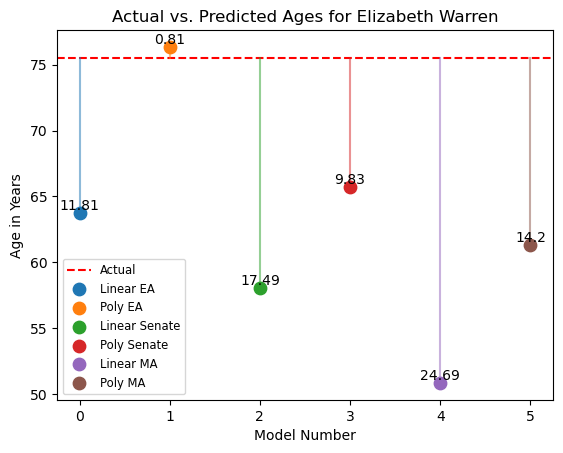

In [1963]:
def make_pred_plot(m_lst, p_lst, actual, name):
    ''' Function: Given a list of model name, the correponding predicted value, the actual value, and the name of the congressmember,
        point them all as point to see how far off the predictions were from the actual
        Parameters:
        m_lst = list of strings (model names)
        p_lst = list of predictions (floats)
        actual = float (actual age)
        name = string 
        Returns: A custom scatterplot with a horizontal line to represent the actual value 
    '''
    gap = []
    plt.axhline(actual_warren, color='red', linestyle='dashed', label = 'Actual')
    for i in range(len(p_lst)):
        diff = abs(p_lst[i] - actual)
        gap.append(round(diff, 2))
    for i in range(len(m_lst)):
        plt.scatter(i, p_lst[i], s=80, label =  f'{m_lst[i]}')
        plt.text(i, p_lst[i], f'{gap[i]}', ha='center', va='bottom')
        plt.plot([i, i], [p_lst[i], actual],alpha=0.5)
    plt.legend(fontsize='small')
    plt.xlabel('Model Number')
    plt.ylabel('Age in Years')
    plt.title(f'Actual vs. Predicted Ages for {name}')
    return plt.show()
    
make_pred_plot(models, pred_lst, actual_warren, 'Elizabeth Warren')

*make a plot that shows the mse scores across the diff models*

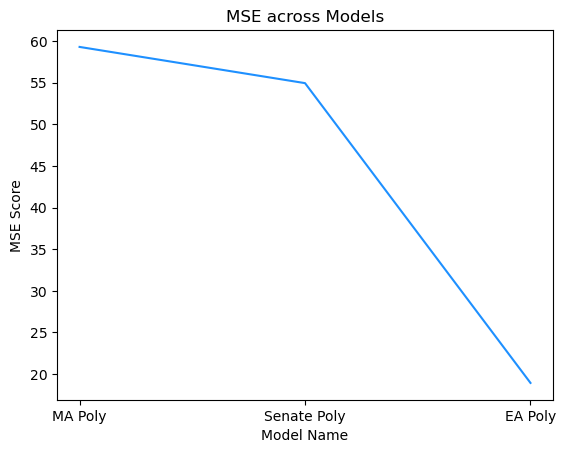

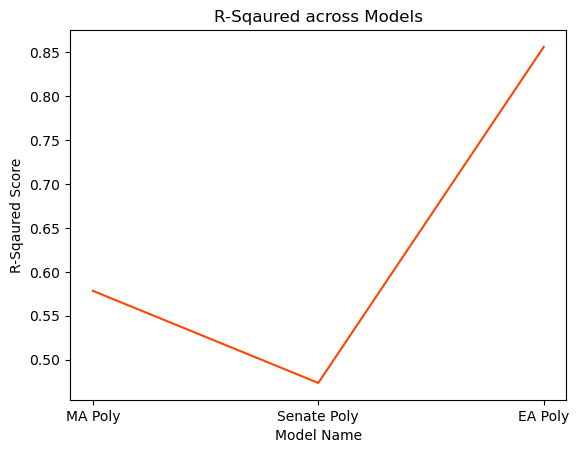

In [1964]:
def score_lineplot(nums, s_lst, s_type, m_lst, c):
    ''' Function: Given a list of numbers, scores, a score type, and a list of models, visualize the scores across the different
        models 
        Parameters:
        nums = list of ints 
        s_lst = list of floats/int
        s_type = string 
        m_lst = list of string
        c = string (color)
        Returns: A line plot showing the specified scores across the different models 
    '''
    for s in s_lst:
        s = round(s, 3)
    plt.plot(nums, s_lst, color=c)
    plt.xlabel('Model Name')
    plt.ylabel(f'{s_type} Score')
    plt.title(f'{s_type} across Models')
    plt.xticks(range(len(s_lst)), m_lst)
    return plt.show()


mse_scores = [eval_regression(poly3_model, ma_test_poly, ma_y_test)[0], eval_regression(poly2_model, sen_test_poly, ys_test)[0], eval_regression(poly_model, X_test_poly, y_test)[0]]
r_2_scores = [eval_regression(poly3_model, ma_test_poly, ma_y_test)[1], eval_regression(poly2_model, sen_test_poly, ys_test)[1], eval_regression(poly_model, X_test_poly, y_test)[1]]
poly_model_lst = ['MA Poly', 'Senate Poly', 'EA Poly']
score_lineplot([0, 1, 2], mse_scores, 'MSE', poly_model_lst, 'dodgerblue')
score_lineplot([0, 1, 2], r_2_scores, 'R-Sqaured', poly_model_lst, 'orangered')

*put all the mse and r-squared scores into a list*

In [1965]:
ea1_mse = eval_regression(model, X_test, y_test)[0]
ea2_mse = eval_regression(poly_model, X_test_poly, y_test)[0]
sen1_mse = eval_regression(lr, Xs_test, ys_test)[0]
sen2_mse = eval_regression(poly2_model, sen_test_poly, ys_test)[0]
ma1_mse = eval_regression(lr_ma, ma_X_test, ma_y_test)[0]
ma2_mse = eval_regression(poly3_model, ma_test_poly, ma_y_test)[0]
tot_mse = [ea1_mse, ea2_mse, sen1_mse, sen2_mse, ma1_mse, ma2_mse]
len(tot_mse) == len(models)

True

In [1966]:
ea1_r = eval_regression(model, X_test, y_test)[1]
ea2_r = eval_regression(poly_model, X_test_poly, y_test)[1]
sen1_r = eval_regression(lr, Xs_test, ys_test)[1]
sen2_r = eval_regression(poly2_model, sen_test_poly, ys_test)[1]
ma1_r = eval_regression(lr_ma, ma_X_test, ma_y_test)[1]
ma2_r = eval_regression(poly3_model, ma_test_poly, ma_y_test)[1]
tot_r = [ea1_r, ea2_r, sen1_r, sen2_r, ma1_r, ma2_r]
len(tot_r) == len(models)

True

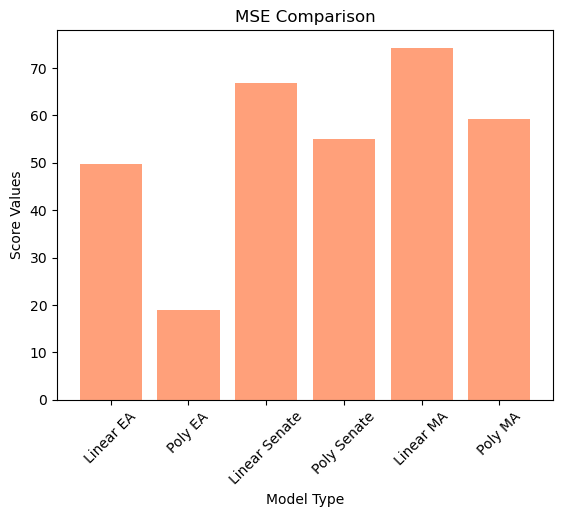

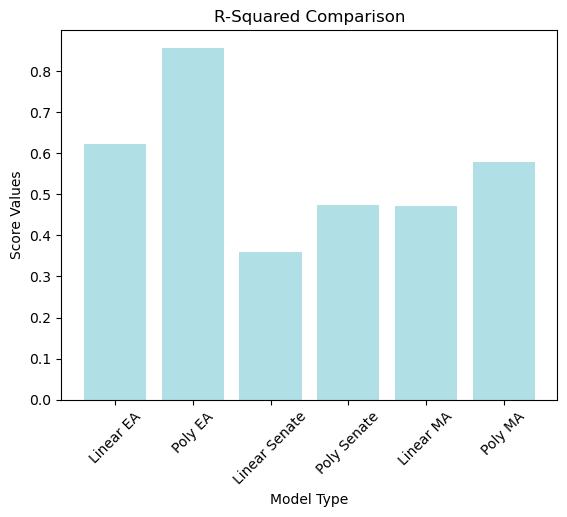

In [1967]:
def viz_scores(x, y1, score, c):
    ''' Function: Given x and y data, a score type and color, plot a custom bar chart that highlight the differences 
        between different models 
        Parameters:
        x = lst of string
        y1 = list of int/float
        score = string
        c = color (string)
        Returns: A custom bar chart that shows the scores across models 
    '''
    plt.bar(x, y1, color=c)
    plt.xticks(rotation=45)
    plt.xlabel('Model Type')
    plt.ylabel('Score Values')
    plt.title(f'{score} Comparison')
    return plt.show()

viz_scores(models, tot_mse, 'MSE','lightsalmon')
viz_scores(models, tot_r, 'R-Squared','powderblue')

# Web Scrapping

## Data Cleaning

In [1968]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
url = "https://www.govtrack.us/congress/bills/statistics"

In [1969]:
html = urlopen(url)
bs = BeautifulSoup(html.read(), "html.parser")

In [1970]:
table = bs.find('table')
table_rows = table.find_all('tr')

In [1971]:
def get_headers(html): 
    ''' Function: Given the html code, find the headers for the data frame
        Parameters: 
        html = html code
        Returns: A list of headers for the data frame
    '''
    headers = []
    for cell in html:
        header = cell.text
        headers.append(header.strip().replace('\n', ','))
    return headers[0].split(',')

get_headers(table_rows)

['Congress',
 'Enacted Legislation (including via incorporation)',
 'Enacted Legislation',
 'Passed Resolutions',
 'Got A Vote',
 'Failed Legislation',
 'Vetoed Bills (without Override)',
 'Other Legislation',
 'TOTAL']

In [1972]:
headers = get_headers(table_rows)

def get_data(t1, t2):
    ''' Function: Given two HTML tags, isolate the relevant code 
        Parameters:
        t1 = string 
        t2 = string 
        Returns: A 2D list with the relevant data in each row in its own list
    '''
    data = []
    for row in table.find_all(t1):
        row_data = []
        for cell in row.find_all(t2):
            info = cell.text
            row_data.append(info.strip().replace('\n', ' '))
        data.append(row_data)
    return data 

data = get_data('tr', 'td')

In [1973]:
web_df = pd.DataFrame(data)
web_df.head()

,0,1,2,3,4,5,6,7
0,None,None,None,None,None,None,None,None
1,"118th Jan 3, 2023 -present",173 1%,47 0%,478 3%,365 3%,26 0%,10 0%,"13,204 93%"
2,"117th Jan 3, 2021 -Jan 3, 2023","1,234 7%",365 2%,760 4%,649 4%,22 0%,0 0%,"16,021 90%"
3,"116th Jan 3, 2019 -Jan 3, 2021","1,229 7%",344 2%,714 4%,746 4%,24 0%,9 0%,"14,764 89%"
4,"115th Jan 3, 2017 -Jan 3, 2019","1,085 8%",443 3%,758 6%,867 6%,14 0%,0 0%,"11,474 85%"


In [1974]:
def clean_col(df, col_lst):
    ''' Function: Given a data frame and list of columns, return a cleaned dataframe 
        Parameters:
        df = data frame 
        col_lst = list of ints
        Returns: A cleaned dataframe 
    '''
    for col in col_lst:
        for i in range(len(df)):
            if i == 0:
                pass
            else: 
                df[col].iloc[i] = df[col].iloc[i].replace('\n', ' ').strip()
    return df

columns = list(web_df.columns)
clean_col(web_df, columns)

/var/folders/5b/6lvktnb96955q0486jnqvwf80000gn/T/ipykernel_5633/807414422.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col].iloc[i] = df[col].iloc[i].replace('\n', ' ').strip()


,0,1,2,3,4,5,6,7
0,None,None,None,None,None,None,None,None
1,"118th Jan 3, 2023 -present",173 1%,47 0%,478 3%,365 3%,26 0%,10 0%,"13,204 93%"
2,"117th Jan 3, 2021 -Jan 3, 2023","1,234 7%",365 2%,760 4%,649 4%,22 0%,0 0%,"16,021 90%"
3,"116th Jan 3, 2019 -Jan 3, 2021","1,229 7%",344 2%,714 4%,746 4%,24 0%,9 0%,"14,764 89%"
4,"115th Jan 3, 2017 -Jan 3, 2019","1,085 8%",443 3%,758 6%,867 6%,14 0%,0 0%,"11,474 85%"
5,"114th Jan 6, 2015 -Jan 3, 2017",776 6%,329 3%,708 6%,662 5%,22 0%,9 0%,"10,333 86%"
6,"113th Jan 3, 2013 -Jan 2, 2015",448 4%,296 3%,663 6%,474 4%,20 0%,0 0%,"9,184 86%"
7,"112th Jan 5, 2011 -Jan 3, 2013",500 4%,284 2%,722 6%,390 3%,38 0%,0 0%,"10,865 88%"
8,"111th Jan 6, 2009 -Dec 22, 2010",639 5%,385 3%,"1,465 11%",603 4%,43 0%,2 0%,"11,177 82%"
9,"110th Jan 4, 2007 -Jan 3, 2009",745 5%,460 3%,"1,438 10%",862 6%,43 0%,7 0%,"11,232 80%"


*cleaned all the None data to zero*

In [1975]:
web_df = web_df.fillna(0)
web_df = web_df.drop(0)
web_df 

,0,1,2,3,4,5,6,7
1,"118th Jan 3, 2023 -present",173 1%,47 0%,478 3%,365 3%,26 0%,10 0%,"13,204 93%"
2,"117th Jan 3, 2021 -Jan 3, 2023","1,234 7%",365 2%,760 4%,649 4%,22 0%,0 0%,"16,021 90%"
3,"116th Jan 3, 2019 -Jan 3, 2021","1,229 7%",344 2%,714 4%,746 4%,24 0%,9 0%,"14,764 89%"
4,"115th Jan 3, 2017 -Jan 3, 2019","1,085 8%",443 3%,758 6%,867 6%,14 0%,0 0%,"11,474 85%"
5,"114th Jan 6, 2015 -Jan 3, 2017",776 6%,329 3%,708 6%,662 5%,22 0%,9 0%,"10,333 86%"
6,"113th Jan 3, 2013 -Jan 2, 2015",448 4%,296 3%,663 6%,474 4%,20 0%,0 0%,"9,184 86%"
7,"112th Jan 5, 2011 -Jan 3, 2013",500 4%,284 2%,722 6%,390 3%,38 0%,0 0%,"10,865 88%"
8,"111th Jan 6, 2009 -Dec 22, 2010",639 5%,385 3%,"1,465 11%",603 4%,43 0%,2 0%,"11,177 82%"
9,"110th Jan 4, 2007 -Jan 3, 2009",745 5%,460 3%,"1,438 10%",862 6%,43 0%,7 0%,"11,232 80%"
10,"109th Jan 4, 2005 -Dec 9, 2006",589 5%,483 4%,"1,028 8%",597 5%,39 0%,1 0%,"10,924 84%"


In [1976]:
def scrape_to_df(df, h_lst):
    ''' Function: Add headers and get rid of unnecessary data into the existing data frame 
        Parameters:
        df = data frame 
        h_lst = list of strings 
        Returns: a new df with string headers and cleaned data 
    '''
    dct = {}
    for i in range(len(h_lst)):
        dct[i] = h_lst[i]
    df = df.rename(columns=dct)
    for i in range(len(df)):
        for h in h_lst:
            df[h].iloc[i] = df[h].iloc[i].split(" ")[0]
    return df

cleaned = scrape_to_df(web_df, headers[:-1])
cleaned.head()

/var/folders/5b/6lvktnb96955q0486jnqvwf80000gn/T/ipykernel_5633/4159107554.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[h].iloc[i] = df[h].iloc[i].split(" ")[0]


,Congress,Enacted Legislation (including via incorporation),Enacted Legislation,Passed Resolutions,Got A Vote,Failed Legislation,Vetoed Bills (without Override),Other Legislation
1,118th,173,47,478,365,26,10,"13,204"
2,117th,"1,234",365,760,649,22,0,"16,021"
3,116th,"1,229",344,714,746,24,9,"14,764"
4,115th,"1,085",443,758,867,14,0,"11,474"
5,114th,776,329,708,662,22,9,"10,333"


In [1977]:
def get_congress(df, header, los):
    ''' Given a data frame, header, and list of unnecessary strings, 
        clean a given column to remove these strings featured in the los 
    '''
    for i in range(len(df)):
        for s in range(len(los)):
            df.iloc[i][header] = df.iloc[i][header].replace(los[s], "")
    return df 
    
strings = ["th", "rd", "nd", "st"]
cleaned = get_congress(cleaned, "Congress", strings) 
cleaned.head()

/var/folders/5b/6lvktnb96955q0486jnqvwf80000gn/T/ipykernel_5633/2210457249.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[i][header] = df.iloc[i][header].replace(los[s], "")


,Congress,Enacted Legislation (including via incorporation),Enacted Legislation,Passed Resolutions,Got A Vote,Failed Legislation,Vetoed Bills (without Override),Other Legislation
1,118,173,47,478,365,26,10,"13,204"
2,117,"1,234",365,760,649,22,0,"16,021"
3,116,"1,229",344,714,746,24,9,"14,764"
4,115,"1,085",443,758,867,14,0,"11,474"
5,114,776,329,708,662,22,9,"10,333"


In [1978]:
def clean_data(value):
    ''' Given a string, get rid of the commas and
        convert to a string 
    '''
    value = value.replace(",", "")
    return int(value)

def apply_clean(df):
    ''' Given a data frame, apply the clean_data function to each column
    '''
    for col in list(df.columns): 
        df[col] = df[col].apply(clean_data)
    return df 

def add_columns(df):
    ''' Given a data frame, add a total column to the data frame
    '''
    if 'Total' not in df.columns:
        total_df = df[list(df.columns)[2:]]
        totals = []
        for i in range(len(total_df)):
            totals.append(total_df.iloc[i].sum(axis=0))
            # Check if 'Total' column is created
            if 'Total' in df.columns:
                break  # Exit the loop if 'Total' column is created
        df['Total'] = totals
    return df
    
cleaned = add_columns(apply_clean(cleaned)).sort_values(by='Congress')
cleaned.head()

,Congress,Enacted Legislation (including via incorporation),Enacted Legislation,Passed Resolutions,Got A Vote,Failed Legislation,Vetoed Bills (without Override),Other Legislation,Total
26,93,1138,772,903,562,0,35,23950,26222
25,94,981,729,1023,609,0,26,21898,24285
24,95,1170,804,981,589,0,18,19921,22313
23,96,915,736,906,573,0,10,12365,14590
22,97,662,529,370,498,2,13,11824,13236


## Visualizations

*want to make a stacked bar chart for the 108th - 118th congresses*

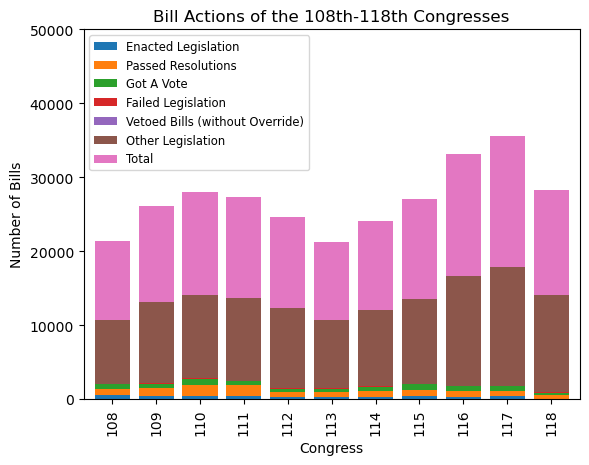

In [1979]:
plotting_df = new_cleaned[new_cleaned['Congress'] >= 108]
plotting_df = plotting_df.sort_values(by='Congress')


plot_labels = new_cleaned.columns[2:]

def plot_bills(df, header, labels):
    ''' Given a dataframe, create a stacked bar chart that shows the differences in bill activity over the years 
        df = data frame 
        header = string 
        labels = list of strings 
    '''
    iso_df = df[labels]
    iso_df.plot(kind='bar', stacked=True, width=0.8)
    plt.xticks(range(len(df[header])), df[header])
    plt.xlabel('Congress')
    plt.ylabel('Number of Bills')
    plt.title('Bill Actions of the 108th-118th Congresses')
    plt.ylim(0, 50000)
    plt.legend(loc='upper left', fontsize='small')
    return plt.show()
    
plot_bills(plotting_df, 'Congress', plot_labels)

In [1980]:
def plot_normalized(x, y1, y2, l1, l2, title, c1, c2):
    ''' Function: Given the same x data and two different y datasets, normalize them and plot them together for comparison
        Parameters:
        x = x data (lst)
        y1 = y1 data (lst)
        y2 = y2 data (lst)
        l1 = str, label for legend 
        l2 = str, label for legend
        title = str 
        c1 = color (str) 
        c2 = color (str)
        Returns: A line plot visualizing the two y data sets against the same x data 
    '''
    y1 = normalize(y1)
    y2 = normalize(y2)
    plt.plot(x, y1, color = c1, label = l1) 
    plt.plot(x, y2, color = c2, label = l2)
    plt.xlabel("Congressional Class")
    plt.ylabel("Normalized Values")
    plt.title(title)
    plt.legend()
    return plt.show()


*plot something to see the productivity over time*

In [1981]:
congress_plot = list(new_cleaned['Congress'])
enacted = list(new_cleaned['Enacted Legislation'])
total_plot = list(new_cleaned['Total'])

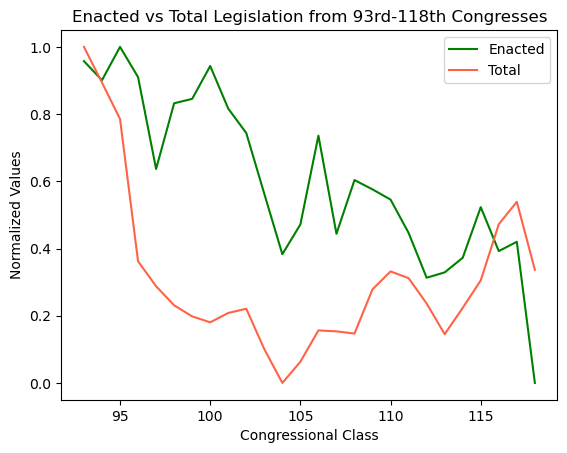

In [1982]:
plot_normalized(congress_plot, enacted, total_plot, 'Enacted', 'Total', 'Enacted vs Total Legislation from 93rd-118th Congresses', 'green', 'tomato')

In [1983]:
cong_df = df[df['congress'] >= 93]
new_keys = list(set(cong_df["congress"]))

cong_ages = get_mean(cong_df, new_keys, 'age_years')
cong_ages

{93: 52.4080047165146,
 94: 51.28930660560798,
 95: 50.601872520943736,
 96: 50.006014212555144,
 97: 49.5169049726055,
 98: 50.02744393452206,
 99: 51.0476631480037,
 100: 51.845568104007356,
 101: 52.66166066948624,
 102: 53.81787296965329,
 103: 52.92734917360806,
 104: 52.68546102913444,
 105: 53.07348411623162,
 106: 54.13964816849722,
 107: 54.71520720919561,
 108: 55.4300343248423,
 109: 56.51792024714815,
 110: 57.295497133369764,
 111: 57.79101979981917,
 112: 57.630214640714286,
 113: 57.529619248813866,
 114: 57.89433464815157,
 115: 58.77051754012613,
 116: 58.437879977518385,
 117: 58.831017215934665,
 118: 58.55512478669776}

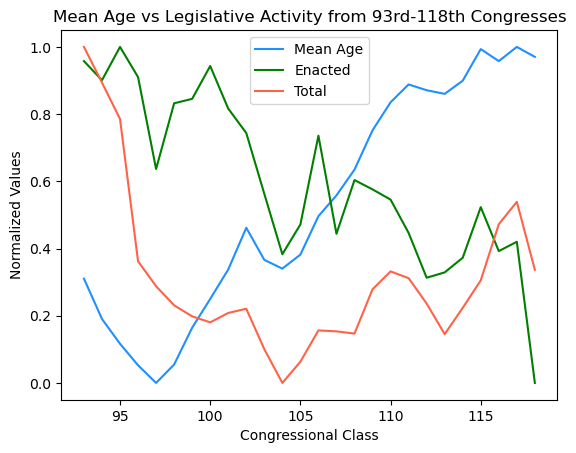

In [1984]:
ages_plot = list(cong_ages.values())

def plot_multiple(x, y_data, labels, colors, title):
    ''' Function: Normalize and plot different y data on the same line plot 
        x = list of ints
        y_data = list of data, 2d lst 
        labels = list of strings
        colors = list of strings
        title = string
        Returns: A custom line plot to compare the relationship between different y data
    '''
    for i in range(len(y_data)):
        plt.plot(x, normalize(y_data[i]), label=labels[i], color=colors[i])
    plt.xlabel('Congressional Class')
    plt.ylabel('Normalized Values')
    plt.title(title)
    plt.legend()
    return plt.show()

y_lst = [ages_plot, enacted, total_plot]
p1_labels = ['Mean Age', 'Enacted', 'Total']
p1_colors = ['dodgerblue', 'green', 'tomato']
plot_multiple(congress_plot, y_lst, p1_labels, p1_colors, 'Mean Age vs Legislative Activity from 93rd-118th Congresses')

In [1985]:
def get_count(df, keys):
    ''' Given a data frame and a list of congressional classes (keys), make a dct where the class is the key
        and the value is the count of a subset of the data frame 
    '''
    congress_dct = {}
    for item in keys:
        new_df = df[df['congress'] == item]
        congress_dct[item] = new_df.shape[0]
    return congress_dct 

dems = cong_df[cong_df['party_code'] == 100]
dem_count = get_count(dems, new_keys)
dem_count

{93: 306,
 94: 360,
 95: 360,
 96: 339,
 97: 293,
 98: 321,
 99: 305,
 100: 318,
 101: 321,
 102: 332,
 103: 319,
 104: 251,
 105: 257,
 106: 259,
 107: 264,
 108: 256,
 109: 247,
 110: 292,
 111: 328,
 112: 253,
 113: 260,
 114: 234,
 115: 248,
 116: 283,
 117: 277,
 118: 261}

*make a plot that finds the percentage; percentage passed over time*

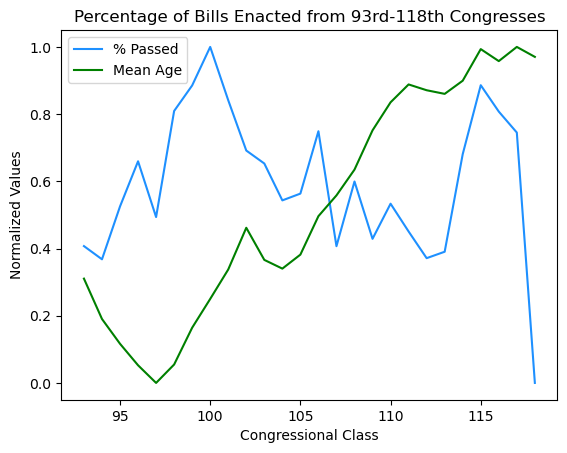

In [1986]:
def get_pct(df, new_h, h1, h2):
    ''' Given a data frame, make a new column that gets the percentage of a two selected columns 
        df = data frame 
        new_h = string
        h1 = string 
        h2 = string 
    '''
    pct_lst = []
    for i in range(len(df)):
        pct_lst.append((df.iloc[i][h1] / df.iloc[i][h2]) * 100)
    df[new_h] = pct_lst
    return df

pct_df = get_pct(cleaned, 'passed_PCT', 'Enacted Legislation (including via incorporation)', 'Total')
pct_df = pct_df.sort_values(by='Congress')
pct_x = list(pct_df['Congress'])
percent_passed = list(pct_df['passed_PCT'])

plot_normalized(pct_x, percent_passed, ages_plot, '% Passed', 'Mean Age', 'Percentage of Bills Enacted from 93rd-118th Congresses', 'dodgerblue', 'green')

In [1987]:
dems_plot = list(dem_count.values())

reps = cong_df[cong_df['party_code'] == 200]
reps_count = get_count(reps, new_keys)
reps_plot = list(reps_count.values())

len(dems_plot), len(reps_plot)

(26, 26)

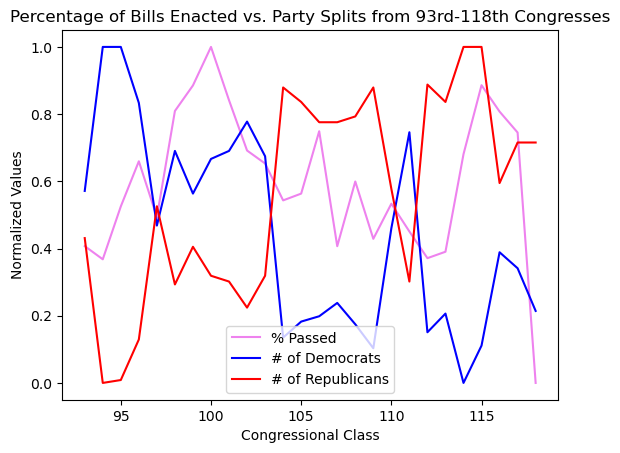

In [1988]:
y2_lst = [percent_passed, dems_plot, reps_plot]
p2_labels = ['% Passed', '# of Democrats', '# of Republicans']
p2_colors = ['violet', 'blue', 'red']
          
plot_multiple(pct_x, y2_lst, p2_labels, p2_colors, 'Percentage of Bills Enacted vs. Party Splits from 93rd-118th Congresses')